# Devender Dayal

Hello everyone! This will be an analysis on the following [datasets](https://www.kaggle.com/wsj/college-salaries) to predict salary information and view salary implications based off of what major students decide to choose. The data that was provided was found on Kaggle and was created by The Wall Street Journal. This data was last updated April 29, 2017.

We are going to be discussing the following in today's presentation:
- Techniques & Methods
- Results
- Predictive Model
- Validation of Model

## Data

In [449]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics 

In [450]:
salRegion = pd.read_csv('salaries-by-region.csv')
salCollege = pd.read_csv('salaries-by-college-type.csv')
payDegree = pd.read_csv('degrees-that-pay-back.csv')
dupRegion = pd.read_csv('duplicateRegion.csv')
dupType = pd.read_csv('dupType.csv')

Before analyzing the data, let's preview all of our data to make sure we have the right datasets.

In [451]:
salRegion.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Adelphi University,Northeastern,"$40,600.00","$61,776.00","$44,200.00","$54,800.00","$114,000.00","$160,000.00"
1,"American University, Washington D.C.",Southern,"$45,300.00","$107,144.00","$45,200.00","$62,400.00","$134,000.00","$169,000.00"
2,Amherst College,Northeastern,"$54,500.00","$117,700.00",NaN,"$84,900.00","$162,000.00",NaN
3,Appalachian State University,Southern,"$40,400.00","$62,881.00","$37,200.00","$50,400.00","$90,800.00","$115,000.00"
4,Arizona State University (ASU),Western,"$47,400.00","$82,418.00","$44,600.00","$60,700.00","$114,000.00","$163,000.00"


In [452]:
salCollege.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Amherst College,Liberal Arts,"$58,315.00","$107,000.00",NaN,"$84,900.00","$162,000.00",NaN
1,Appalachian State University,State,"$40,400.00","$69,100.00","$37,200.00","$50,400.00","$90,800.00","$115,000.00"
2,Arizona State University (ASU),Party,"$37,920.00","$84,100.00","$44,600.00","$60,700.00","$114,000.00","$163,000.00"
3,Arkansas State University (ASU),State,"$39,474.00","$63,300.00","$33,600.00","$45,300.00","$83,900.00","$118,000.00"
4,Auburn University,State,"$40,406.00","$84,700.00","$45,400.00","$62,700.00","$109,000.00","$145,000.00"


In [453]:
payDegree.dropna().head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$44,620.00","$77,100.00",72.8,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$55,969.00","$101,000.00",80.5,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$40,470.00","$71,900.00",77.7,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$41,952.00","$61,500.00",46.6,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$45,344.00","$76,800.00",69.4,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


As we can see from our datasets, not all of the data is completely clean. Before analyzing the data, we are going to clean it first.

In [454]:
salCollege = salCollege.replace({'\$':''}, regex = True).replace({'\,':''}, regex = True)
salCollege = salCollege.astype({'Starting Median Salary': 'float', 
                               'Mid-Career Median Salary': 'float',
                               'Mid-Career 10th Percentile Salary': 'float',
                               'Mid-Career 25th Percentile Salary': 'float',
                               'Mid-Career 75th Percentile Salary': 'float',
                               'Mid-Career 90th Percentile Salary': 'float'})

salRegion = salRegion.replace({'\$':''}, regex = True).replace({'\,':''}, regex = True)
salRegion = salRegion.astype({'Starting Median Salary': 'float', 
                              'Mid-Career Median Salary': 'float',
                              'Mid-Career 10th Percentile Salary': 'float',
                              'Mid-Career 25th Percentile Salary': 'float',
                              'Mid-Career 75th Percentile Salary': 'float',
                              'Mid-Career 90th Percentile Salary': 'float'})

dupRegion = dupRegion.replace({'\$':''}, regex = True).replace({'\,':''}, regex = True)
dupRegion = dupRegion.astype({'Starting Median Salary': 'float', 
                              'Mid-Career Median Salary': 'float',
                              'Mid-Career 10th Percentile Salary': 'float',
                              'Mid-Career 25th Percentile Salary': 'float',
                              'Mid-Career 75th Percentile Salary': 'float',
                              'Mid-Career 90th Percentile Salary': 'float'})

dupType = dupType.replace({'\$':''}, regex = True).replace({'\,':''}, regex = True)
dupType = dupType.astype({'Starting Median Salary': 'float', 
                              'Mid-Career Median Salary': 'float',
                              'Mid-Career 10th Percentile Salary': 'float',
                              'Mid-Career 25th Percentile Salary': 'float',
                              'Mid-Career 75th Percentile Salary': 'float',
                              'Mid-Career 90th Percentile Salary': 'float'})


payDegree = payDegree.replace({'\$':''}, regex = True).replace({'\,':''}, regex = True)
payDegree = payDegree.astype({'Starting Median Salary': 'float', 
                              'Mid-Career Median Salary': 'float',
                              'Percent change from Starting to Mid-Career Salary': 'float',
                              'Mid-Career 10th Percentile Salary': 'float',
                              'Mid-Career 25th Percentile Salary': 'float',
                              'Mid-Career 75th Percentile Salary': 'float',
                              'Mid-Career 90th Percentile Salary': 'float'})
salCollege.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Amherst College,Liberal Arts,58315.0,107000.0,NaN,84900.0,162000.0,NaN
1,Appalachian State University,State,40400.0,69100.0,37200.0,50400.0,90800.0,115000.0
2,Arizona State University (ASU),Party,37920.0,84100.0,44600.0,60700.0,114000.0,163000.0
3,Arkansas State University (ASU),State,39474.0,63300.0,33600.0,45300.0,83900.0,118000.0
4,Auburn University,State,40406.0,84700.0,45400.0,62700.0,109000.0,145000.0


Now that we've cleaned the data, let's analyze it.

## Analysis

### Starting Median Salary

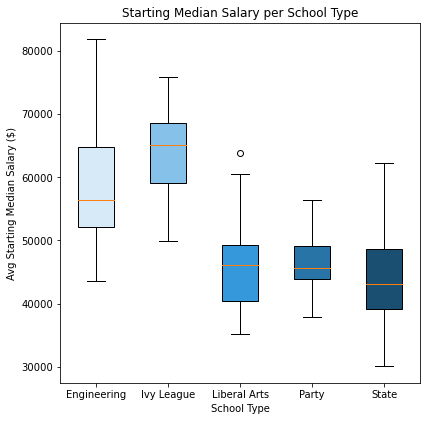

In [455]:
#starting salary of all school types.
temp = salCollege[["School Type", "Starting Median Salary"]]
xtick = temp.groupby("School Type").mean().round(2) 
#engineering
eng = temp.loc[temp['School Type'] == "Engineering"]
eng_y = eng['Starting Median Salary'].tolist()
#ivy league
ivy = temp.loc[temp['School Type'] == "Ivy League"]
ivy_y = ivy['Starting Median Salary'].tolist()
#liberal arts
lib = temp.loc[temp['School Type'] == "Liberal Arts"]
lib_y = lib['Starting Median Salary'].tolist()
#party
party = temp.loc[temp['School Type'] == "Party"]
par_y = party['Starting Median Salary'].tolist()
#state
state = temp.loc[temp['School Type'] == "State"]
sta_y = state['Starting Median Salary'].tolist()

boxdata = [eng_y, ivy_y, lib_y, par_y, sta_y]

fig = plt.figure(figsize =(5, 5)) 
  
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 

# x-axis labels
ax.set_xticklabels(xtick.index)
bp = ax.boxplot(boxdata, patch_artist = True) 

colors = ['#D6EAF8', '#85C1E9',  
          '#3498DB', '#2874A6', '#1B4F72']
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 

plt.title("Starting Median Salary per School Type", color = 'black')
plt.ylabel('Avg Starting Median Salary ($)', color = 'black')
plt.xlabel("School Type");

From the graph above, we can see the starting median salary is highest for students coming from Ivy League schools. The graph also shows that coming from an Engineering school has the highest potential of earning more than 80,000 for a starting salary. The other types of colleges are very similar with their starting median salaries.

Now, let's look at the breakdown of salaries by region.

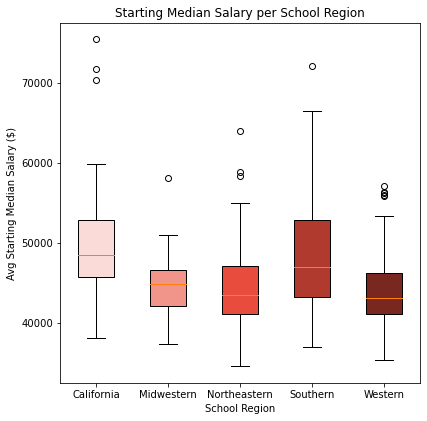

In [456]:
#starting salary of all school types.
region = salRegion[["Region", "Starting Median Salary"]]
xtick = region.groupby("Region").mean().round(2) 
#engineering
cal = region.loc[region['Region'] == "California"]
cal_y = cal['Starting Median Salary'].tolist()
#ivy league
west = region.loc[region['Region'] == "Western"]
west_y = west['Starting Median Salary'].tolist()
#liberal arts
south = region.loc[region['Region'] == "Southern"]
south_y = south['Starting Median Salary'].tolist()
#party
north = region.loc[region['Region'] == "Northeastern"]
north_y = north['Starting Median Salary'].tolist()
#state
mid = region.loc[region['Region'] == "Midwestern"]
mid_y = mid['Starting Median Salary'].tolist()

boxdata = [cal_y, west_y, south_y, north_y, mid_y]

fig = plt.figure(figsize =(5, 5)) 
  
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 

# x-axis labels
ax.set_xticklabels(xtick.index)
bp = ax.boxplot(boxdata, patch_artist = True) 

colors = ['#FADBD8', '#F1948A',  
          '#E74C3C', '#B03A2E', '#78281F']
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 

plt.title("Starting Median Salary per School Region", color = 'black')
plt.ylabel('Avg Starting Median Salary ($)')
plt.xlabel("School Region");

The graph shows that students who graduate from any schools in California earn a higher starting salary than in any other region. Although, the Southern and Midwestern regions aren't far behind. Also, the graph shows that most students coming from Southern schools have the potential to earn the most starting salary, with exception to a few outliers coming from California schools.

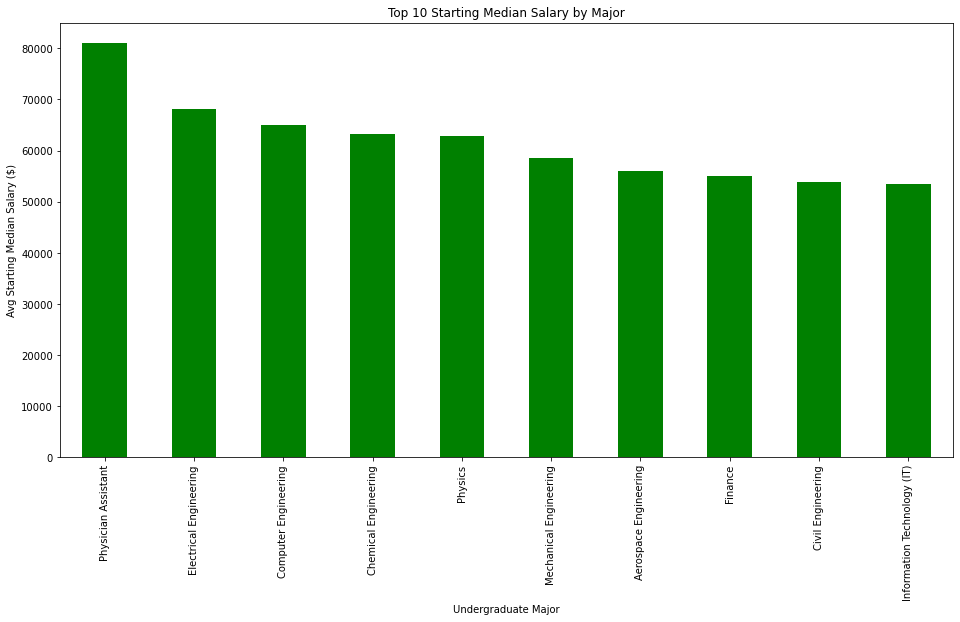

In [457]:
deg = payDegree[["Undergraduate Major", "Starting Median Salary"]].sort_values(by = ['Starting Median Salary'], ascending = False)
deg = deg.head(10)
#groupby(["Undergraduate Major"]).mean()
#deg = deg.sort_values(by=['Starting Median Salary'], inplace=True, ascending=False)
#print (deg.head())

x = np.arange(10)

deg.plot.bar(y = "Starting Median Salary", rot = 0, color = "green", figsize=(16,8), legend = None)
plt.xticks(x, deg['Undergraduate Major'])
plt.ylabel('Avg Starting Median Salary ($)')
plt.xlabel('Undergraduate Major')
plt.xticks(rotation = 90)
plt.title("Top 10 Starting Median Salary by Major");

From the graph above, we can see that on average, a student pursuing a degree as a Physician Assistant will earn him/her the most money, which would be a starting median salary of above 80,000.

Now let's talk about the Mid-Career Median Salary.

### Mid-Career Median Salary

In [458]:
#Analysis of Mid-Career Salary based off of school type.
midSchool = salCollege[["School Type", "Mid-Career 10th Percentile Salary", "Mid-Career 25th Percentile Salary", 
                  "Mid-Career Median Salary", "Mid-Career 75th Percentile Salary", "Mid-Career 90th Percentile Salary"]]
midSchool = midSchool.groupby("School Type").mean().round(2) 
midSchool.head()

,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career Median Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
School Type,,,,,
Engineering,61793.33,81384.21,103842.11,134868.42,173333.33
Ivy League,57900.00,82787.50,120125.00,184125.00,269625.00
Liberal Arts,47478.57,62106.52,89504.35,131252.17,191142.86
Party,44052.63,60005.00,84685.00,118100.00,166947.37
State,41622.44,56248.08,77815.38,105646.79,145211.54


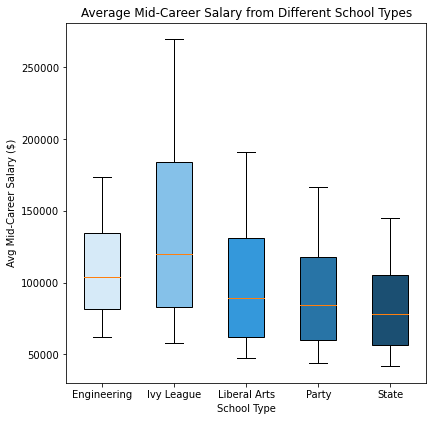

In [459]:
eng = midSchool.iloc[0,].values
ivy = midSchool.iloc[1,].values
la = midSchool.iloc[2,].values
par = midSchool.iloc[3,].values
sta = midSchool.iloc[4,].values

boxdata = [eng, ivy, la, par, sta] 

fig = plt.figure(figsize =(5, 5)) 
  
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 

# x-axis labels 
ax.set_xticklabels(midSchool.index)

# axis titles
plt.title('Average Mid-Career Salary from Different School Types')
plt.xlabel('School Type')
plt.ylabel('Avg Mid-Career Salary ($)')
  
# Creating plot 
bp = ax.boxplot(boxdata, patch_artist = True) 
colors = ['#D6EAF8', '#85C1E9',  
          '#3498DB', '#2874A6', '#1B4F72']
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 

From the boxplot above, we see that Ivy League schools tend to earn the most money in the 90th percentile during their mid-career. Comparing this to the starting career salary, we see more of an overlap between the 25th percentile and 75th percentile.

In [460]:
#Analysis of Mid-Career Salary based off of region.
midReg = salRegion[["Region", "Mid-Career 10th Percentile Salary", "Mid-Career 25th Percentile Salary", 
                  "Mid-Career Median Salary", "Mid-Career 75th Percentile Salary", "Mid-Career 90th Percentile Salary"]]
midReg = midReg.groupby("Region").mean().round(2)
midReg

,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career Median Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
Region,,,,,
California,47777.27,67153.57,90388.39,127350.00,167909.09
Midwestern,43076.56,57026.76,77182.58,107594.37,147689.06
Northeastern,49101.22,65479.00,88158.83,129576.00,181926.83
Southern,43074.65,57506.33,79069.49,109662.03,152769.01
Western,42985.29,56580.95,74572.55,106026.19,143823.53


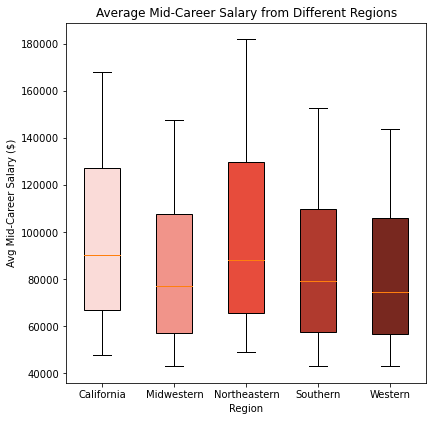

In [461]:
cal = midReg.iloc[0,].values
mid = midReg.iloc[1,].values
north = midReg.iloc[2,].values
south = midReg.iloc[3,].values
west = midReg.iloc[4,].values

box2 = [cal, mid, north, south, west]
fig2 = plt.figure(figsize =(5, 5)) 
  
# Creating axes instance 
ax2 = fig2.add_axes([0, 0, 1, 1]) 

# x-axis labels 
ax2.set_xticklabels(midReg.index)

# axis titles
plt.title('Average Mid-Career Salary from Different Regions')
plt.xlabel('Region')
plt.ylabel('Avg Mid-Career Salary ($)')

bp2 = ax2.boxplot(box2, patch_artist = True) 
colors = ['#FADBD8', '#F1948A',  
          '#E74C3C', '#B03A2E', '#78281F']
for patch, color in zip(bp2['boxes'], colors): 
    patch.set_facecolor(color) 

From the boxplot above, we see that the range of mid-career salary from different regions between the 25th and 75th percentile has increased compared to that of the starting career salary. This means that more people have salaries closer to the median. The salaries were more scattered in the starting career salary by region.

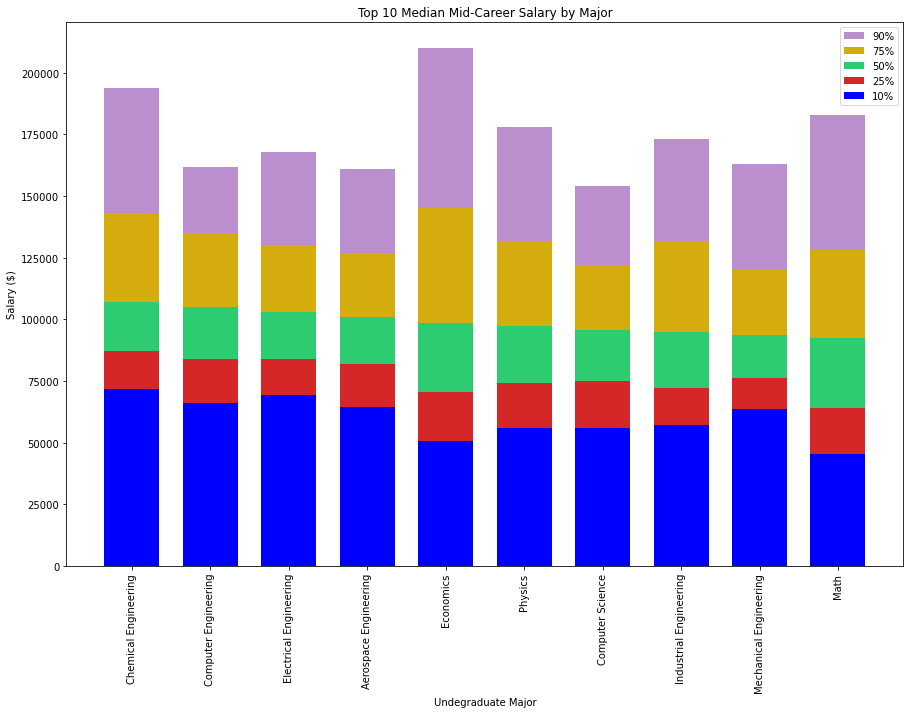

In [462]:
#Analysis of Mid-Career Salary based off of major.
midMaj = payDegree[["Undergraduate Major", "Starting Median Salary", "Percent change from Starting to Mid-Career Salary",
                   "Mid-Career 10th Percentile Salary", "Mid-Career 25th Percentile Salary", 
                  "Mid-Career Median Salary", "Mid-Career 75th Percentile Salary", "Mid-Career 90th Percentile Salary"]]
midMaj = midMaj.groupby("Undergraduate Major").sum().sort_values(by = ['Mid-Career Median Salary'], ascending = False)
midMaj = midMaj.head(10)

p10 = midMaj['Mid-Career 10th Percentile Salary'].tolist()
p25 = midMaj['Mid-Career 25th Percentile Salary'].tolist()
pmed = midMaj['Mid-Career Median Salary'].tolist()
p75 = midMaj['Mid-Career 75th Percentile Salary'].tolist()
p90 = midMaj['Mid-Career 90th Percentile Salary'].tolist()

width = 0.7
x = np.arange(10)
plt.figure(figsize =(15,10)) 
p1 = plt.bar(x, p90, width, color='#BB8FCE')
p2 = plt.bar(x, p75, width, color='#D4AC0D')
p3 = plt.bar(x, pmed, width, color='#2ECC71')
p4 = plt.bar(x, p25, width, color='#d62728')
p5 = plt.bar(x, p10, width, color='b')
plt.xticks(x, midMaj.index)
plt.xticks(rotation = 90)
plt.legend(["90%", "75%", "50%", "25%", "10%"])
plt.title("Top 10 Median Mid-Career Salary by Major")
plt.ylabel("Salary ($)")
plt.xlabel("Undegraduate Major")
plt.show()

From the graph above, we see that the top ten salaries have now changed. Now, chemical engineering is the major with the highest mid-career median salary, while a PA major doesn't even fall in the top 10.

### Percent Change Analysis

In [463]:
#analysis of start/mid-career median salary
print ("\033[4mStarting Median Salary\033[0m")
midMaj = payDegree[["Undergraduate Major", "Starting Median Salary"]]
ace = payDegree[["Undergraduate Major", "Mid-Career Median Salary"]]
hi = payDegree[["Undergraduate Major", "Percent change from Starting to Mid-Career Salary"]]

midMaj = midMaj.sort_values(by=['Starting Median Salary'], ascending = False)
print (midMaj.head(13).to_string(index=False))
print ()
print ("\033[4mMid-Career Median Salary\033[0m")
highMaj = ace.sort_values(by=['Mid-Career Median Salary'], ascending = False)
print (highMaj.head(13).to_string(index = False))


Starting Median Salary
         Undergraduate Major  Starting Median Salary
         Physician Assistant                 80987.0
      Electrical Engineering                 68208.0
        Computer Engineering                 65084.0
        Chemical Engineering                 63200.0
                     Physics                 62875.0
      Mechanical Engineering                 58479.0
       Aerospace Engineering                 55969.0
                     Finance                 55085.0
           Civil Engineering                 53900.0
 Information Technology (IT)                 53519.0
            Computer Science                 51987.0
           Political Science                 50592.0
      Industrial Engineering                 50199.0

Mid-Career Median Salary
    Undergraduate Major  Mid-Career Median Salary
   Chemical Engineering                  107000.0
   Computer Engineering                  105000.0
 Electrical Engineering                  103000.0
  Aerospa

## Predictive Model

### Starting Salary

In [476]:
#calculate mean of all 5 regions
region = salRegion[["Region", "Starting Median Salary"]]
region = region.groupby("Region").mean().round(2).values
california = region[0][0] 
midwestern = region[1][0]
northeastern = region[2][0]
southern = region[3][0]
western = region[4][0]
#calculate standard deviation of region
std = (california, midwestern, northeastern, southern, western)
#std = round(statistics.stdev(std), 2)
std = round(statistics.variance(std), 2)

print("Standard Deviation of region is ", std) 

#calculate mean of all 5 school types
school = salCollege[["School Type", "Starting Median Salary"]]
school = school.groupby("School Type").mean().round(2).values
engineer = school[0][0]
ivy = school[1][0]
liberal = school[2][0]
party = school[3][0]
state = school[4][0]
#calculate standard deviation of school type
std2 = (engineer, ivy, liberal, party, state)
#std2 = round(statistics.stdev(std2), 2)
std2 = round(statistics.variance(std2), 2)
print("Standard Deviation of school type is ", std2) 

#calculate mean of all majors
major = payDegree[["Undergraduate Major", "Starting Median Salary"]]
major = major.groupby("Undergraduate Major").mean().round(2)
#calculate variance of majors
std3 = major["Starting Median Salary"].to_list()
#std3 = round(statistics.stdev(std3), 2)
std3 = round(statistics.variance(std3), 2)
print("Standard Deviation of major is ", std3)

#get starting weights
total = std + std2 + std3
weightRegion = round(std / total, 2)
weightType = round(std2 / total, 2)
weightMajor = round(std3 / total, 2)
print ()
print ("Weight of region is ", weightRegion)
print ("Weight of school type is ", weightType)
print ("Weight of major is ", weightMajor)

Standard Deviation of region is  9488936.0
Standard Deviation of school type is  84318003.85
Standard Deviation of major is  133499585.03

Weight of region is  0.04
Weight of school type is  0.37
Weight of major is  0.59


### Median Salary

In [465]:
#calculate mean of all 5 regions
region2 = salRegion[["Region", "Mid-Career Median Salary"]]
region2 = region2.groupby("Region").mean().round(2).values
california2 = region2[0][0] 
midwestern2 = region2[1][0]
northeastern2 = region2[2][0]
southern2 = region2[3][0]
western2 = region2[4][0]
#calculate standard deviation of region
std = (california, midwestern, northeastern, southern, western)
std = round(statistics.stdev(std), 2)
print("Standard Deviation of region is ", std) 

#calculate mean of all 5 school types
school2 = salCollege[["School Type", "Mid-Career Median Salary"]]
school2 = school2.groupby("School Type").mean().round(2).values
engineer2 = school2[0][0]
ivy2 = school2[1][0]
liberal2 = school2[2][0]
party2 = school2[3][0]
state2 = school2[4][0]
#calculate standard deviation of school type
std2 = (engineer, ivy, liberal, party, state)
std2 = round(statistics.stdev(std2), 2)
print("Standard Deviation of school type is ", std2) 

#calculate mean of all majors
major = payDegree[["Undergraduate Major", "Mid-Career Median Salary"]]
major = major.groupby("Undergraduate Major").mean().round(2)
#calculate variance of majors
std3 = major["Mid-Career Median Salary"].to_list()
std3 = round(statistics.stdev(std3), 2)
print("Standard Deviation of major is ", std3)

#get starting weights
total = std + std2 + std3
weightRegion2 = round(std / total, 2)
weightType2 = round(std2 / total, 2)
weightMajor2 = round(std3 / total, 2)
print ()
print ("Weight of region is ", weightRegion2)
print ("Weight of school type is ", weightType2)
print ("Weight of major is ", weightMajor2)

Standard Deviation of region is  3080.41
Standard Deviation of school type is  9182.48
Standard Deviation of major is  16088.4

Weight of region is  0.11
Weight of school type is  0.32
Weight of major is  0.57


## Validation of Predictive Model

### Starting Career

In [474]:
from statistics import mean
salaryMajor = 51987

reg = dupRegion[["School Name", "Region", "Starting Median Salary"]]
temp = dupType[["School Type"]].values
reg.insert(2, "School Type", temp, True) 
listColleges = reg["School Name"].tolist()
listRegion = reg["Region"].tolist()
listType = reg["School Type"].tolist()
actValue = reg["Starting Median Salary"].tolist()

predValues = []
j = 0

for i in listColleges:
    region = listRegion[j]
    if region == "California":
        salaryRegion = california
    elif region == "Midwestern":
        salaryRegion = midwestern
    elif region == "Northeastern":
        salaryRegion = northeastern
    elif region == "Southern":
        salaryRegion = southern
    elif region == "Western":
        salaryRegion = western
    
    schoolType = listType[j]
    if schoolType == "Engineering":
        salaryType = eng
    elif schoolType == "Ivy League":
        salaryType = ivy
    elif schoolType == "Liberal Arts":
        salaryType = liberal
    elif schoolType == "Party":
        salaryType = party
    elif schoolType == "State":
        salaryType = state
    
    j = j + 1
    totalSalary = (weightRegion*salaryRegion) + (weightType*salaryType) + (weightMajor*salaryMajor)
    predValues.append(totalSalary)
    
error = np.absolute((np.array(actValue) - np.array(predValues))) / np.array(actValue)
avgError = sum(error) / len(error)
avgError = avgError.tolist()
avgError = mean(avgError)
print (round(avgError,4))

0.1355


### Mid-Career

In [467]:
from statistics import mean
#salary for computer science major
salaryMajor = 95500

reg = dupRegion[["School Name", "Region", "Mid-Career Median Salary"]]
temp = dupType[["School Type"]].values
reg.insert(2, "School Type", temp, True) 
listColleges = reg["School Name"].tolist()
listRegion = reg["Region"].tolist()
listType = reg["School Type"].tolist()
actValue = reg["Mid-Career Median Salary"].tolist()

predValues = []
j = 0

for i in listColleges:
    region = listRegion[j]
    if region == "California":
        salaryRegion = california
    elif region == "Midwestern":
        salaryRegion = midwestern
    elif region == "Northeastern":
        salaryRegion = northeastern
    elif region == "Southern":
        salaryRegion = southern
    elif region == "Western":
        salaryRegion = western
    
    schoolType = listType[j]
    if schoolType == "Engineering":
        salaryType = eng
    elif schoolType == "Ivy League":
        salaryType = ivy
    elif schoolType == "Liberal Arts":
        salaryType = liberal
    elif schoolType == "Party":
        salaryType = party
    elif schoolType == "State":
        salaryType = state
    
    j = j + 1
    #totalSalary = ((1/3)*salaryRegion) + ((1/3)*salaryType) + ((1/3)*salaryMajor)
    totalSalary = (weightRegion2*salaryRegion) + (weightType2*salaryType) + (weightMajor2*salaryMajor)
    predValues.append(totalSalary)
    
error = np.absolute((np.array(actValue) - np.array(predValues))) / np.array(actValue)
avgError = sum(error) / len(error)
avgError = avgError.tolist()
avgError = mean(avgError)
print (round(avgError,4))

0.1615
